In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lattpy as lp
import scipy.sparse as sp
import math

# Triangle Arm Chair

## Define lattice

<Axes: >

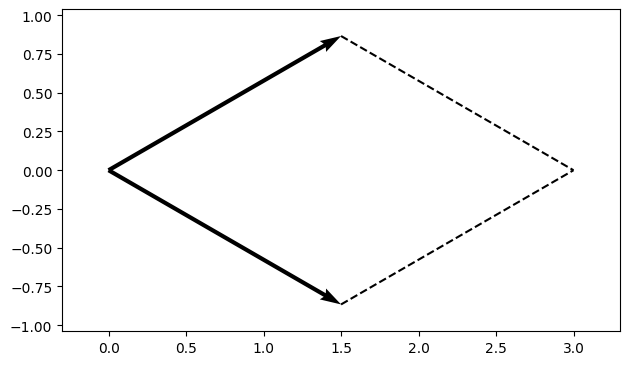

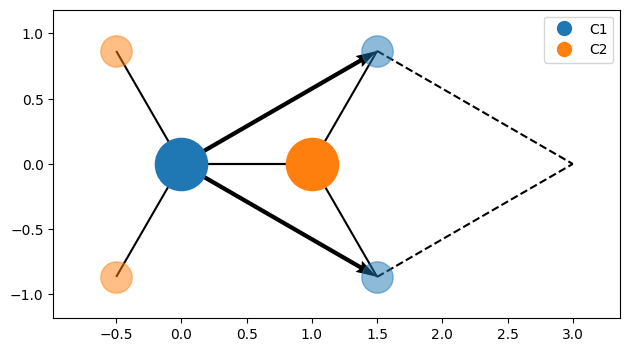

In [3]:
actr_lat = lp.graphene(a=1.0)
actr_lat.plot_basis()
actr_lat.plot_cell()

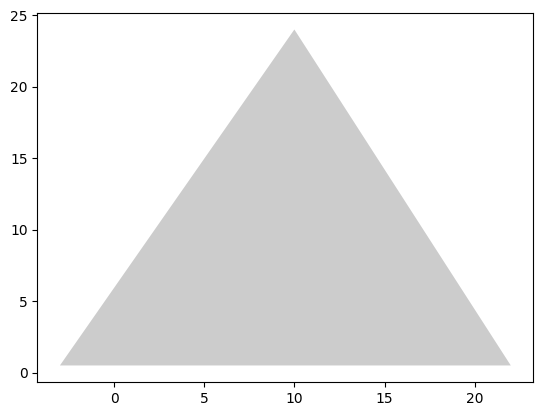

In [4]:
# triangle = lp.shape.ConvexHull([[0, 0.5], [10, 0.5], [5, 10]])
triangle = lp.shape.ConvexHull([[-3, 0.5], [22, 0.5], [10, 24]])
triangle.plot(plt.gca())
plt.show()

<Axes: >

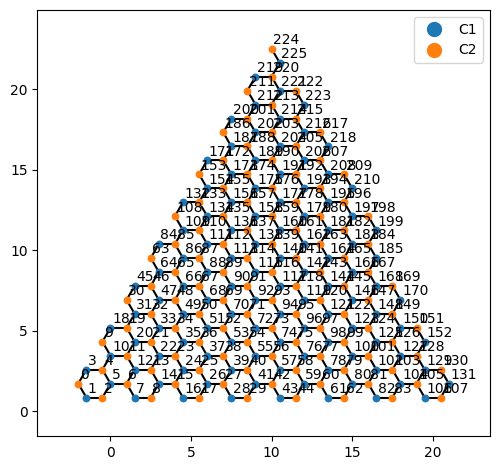

In [5]:
actr_lat.build(triangle)
actr_lat.plot(show_indices=True)

## Define TB Hamiltonian

In [6]:
actr_connections = actr_lat.compute_connections(actr_lat)[0]
num_cites = actr_lat.positions.shape[0]
rows = actr_connections[:, 0]
cols = actr_connections[:, 1]
data = np.ones(actr_connections.shape[0])

H_actr = sp.coo_matrix((data, (rows, cols)), shape=(num_cites, num_cites))

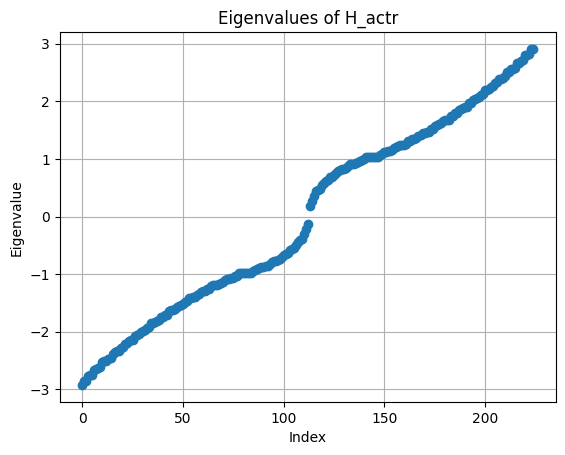

In [7]:
# Solve for the eigenvalues
eigenvalues, eigenstates = sp.linalg.eigsh(H_actr, k=H_actr.shape[0] - 1, which='SM')

# Sort the eigenvalues
sorted_eigenvalues = np.sort(eigenvalues)
sorted_eigenvalues -= np.mean(sorted_eigenvalues[:-1])

# Plot the eigenvalues
plt.plot(sorted_eigenvalues[:], 'o')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of H_actr')
plt.grid(True)
plt.show()

# Traingle, Zigzag

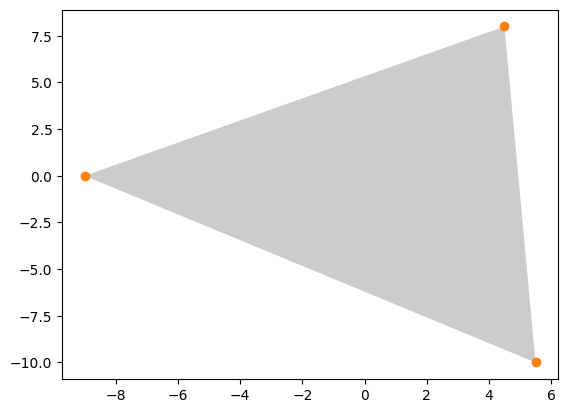

In [26]:
# points = np.array([[0.2, 0.1],
#                    [0.2, 0.1],
#                    [0.2, -0.3],
#                    [8, 4*np.sqrt(3)-1], 
#                    [9, 4*np.sqrt(3)-3], 
#                    [12, -4*np.sqrt(3)+1],
#                 #    [8, -4*np.sqrt(3)+0.7],
#                    [10, -5*np.sqrt(3)],
#         ])
points = np.array([[-9, 0],
                   [5.5, -10],
                   [4.5,  8],
        ])
zztriangle = lp.shape.ConvexHull(points)
zztriangle.plot(plt.gca())
plt.scatter(points.T[0], points.T[1])
plt.show()

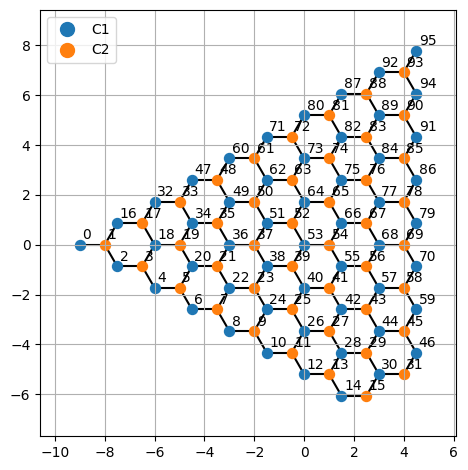

In [27]:
zztr_lat = lp.graphene(a=1.0)
zztr_lat.build(zztriangle, primitive=True, periodic=False, check=True)
zztr_lat.plot(show_indices=True)
plt.grid(True)
plt.show()

In [28]:
delete = [0, 95, ]
delete = np.array(delete)

In [29]:
connections = zztr_lat.compute_connections(zztr_lat)[0]
for conn in connections:
    if conn[0] in delete or conn[1] in delete:
        pass

In [30]:
zztr_connections = zztr_lat.compute_connections(zztr_lat)[0]
num_cites = zztr_lat.positions.shape[0]
rows = zztr_connections[:, 0]
cols = zztr_connections[:, 1]
data = np.ones(zztr_connections.shape[0])

H_zztr = sp.coo_matrix((data, (rows, cols)), shape=(num_cites, num_cites))

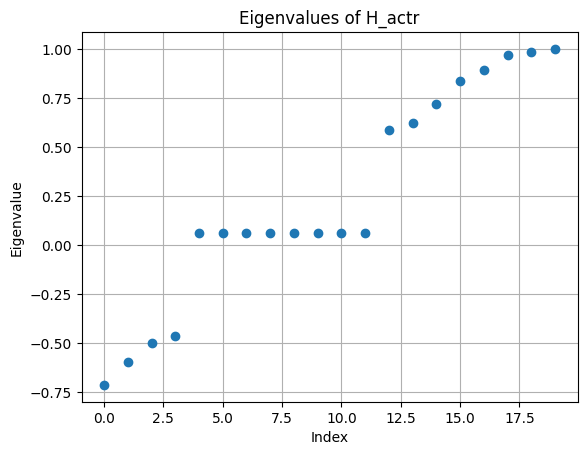

In [32]:
# Solve for the eigenvalues
eigenvalues, eigenstates = sp.linalg.eigsh(H_zztr, k=H_zztr.shape[0] - 1, which='SM')

# Sort the eigenvalues
sorted_eigenvalues = np.sort(eigenvalues)
sorted_eigenvalues -= np.mean(sorted_eigenvalues[:-1])

# Plot the eigenvalues
plt.plot(sorted_eigenvalues[40:60], 'o')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of H_actr')
plt.grid(True)
plt.show()